# Intro

In this project my team and I want to predict Indonesia Industrial Productivity in SME sector.
To do so, we will used several method like:
1.	Data Cleaning
2.	Data understanding using Tableau
3.	Build Supervised learning model
4.	Evaluation 
5.	Tuning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

## Import and understanding data

In [2]:
df = pd.read_csv('DATA_PROJECT.csv')
df.head()

,DPROVI07,DKABUP07,DSTATS07,LOCATI07,JAN07,FEB07,MAR07,APR07,MEI07,JUN07,JUL07,AGS07,SEP07,OKT07,NOP07,DES07,YEAR07,DISIC507,DPUSAT07,DPEMDA07,DDMSTK07,DASING07,CEKSUM07,LPMLTL07,LNMLTL07,LPWLTL07,LNWLTL07,LPRNOU07,LNPNOU07,ZPSVCU07,ZPXVCU07,ZPZVCU07,ZNSVCU07,ZNXVCU07,ZNZVCU07,EPELIU07,EPEVCU07,EPELIE07,EPEVCE07,ESOLIU07,ESOVCU07,ESOLIE07,ESOVCE07,EOILIU07,EOIVCU07,EOILIE07,EOIVCE07,ECLKGU07,ECLVCU07,ECLKGE07,ECLVCE07,EGAM3U07,EGAVCU07,EGAM3E07,EGAVCE07,ELPKGU07,ELPVCU07,ELPKGE07,ELPVCE07,ENCVCU07,ENCVCE07,ELULIU07,ELUVCU07,ELULIE07,ELUVCE07,EFUVCU07,EFUVCE07,MGENOU07,MGEKWU07,EPLKHU07,EPLVCU07,ENPKHU07,ENPVCU07,ESGKHU07,OELKHU07,YELVCU07,IBRVCU07,ILRVCU07,ITXVCU07,IISVCU07,IINVCU07,ICOVCU07,IOTVCU07,IT1VCU07,RDNVCU07,RIMVCU07,RTLVCU07,EKSPOR07,YPRVCU07,PRPRCA07,YISVCU07,YRNVCU07,YT1VCU07,SRJVCU07,SRDVCU07,SRMVCU07,SHJVCU07,SHDVCU07,SHFVCU07,SFJVCU07,SFDVCU07,SFNVCU07,STJVCU07,STDVCU07,STLVCU07,CLTTCU07,CLSACU07,V1101,CBTTCU07,CBSACU07,V1103,CMTTCU07,CMSACU07,V1106,CVTTCU07,CVSACU07,V1109,COTTCU07,COSACU07,V1112,CTTTCU07,CTSACU07,V1115,IINPUT07,OUTPUT07,VTLVCU07,LTLNOU07,PSID,TOTAL PROD,HIGH PROD
0,11,15.0,2,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,15141,10.0,0.0,0.0,90.0,100.0,51,31,2,2,53,33,459448,222066,681514,350575,239559.0,590134,1647,9470,0,0,91535,473693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12696,158704,0,0,641867,0,0.0,0.0,950973,1378911,0,0,0,0,0,0,0,0,0,0,3000,8696,11696,43481216,0,43481216,NaN,59549932,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45510690,59549932,14039242,86,1761,1.308482,0
1,11,15.0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,15141,0.0,0.0,10.0,90.0,100.0,110,782,1,218,111,1000,1474932,779988,2254920,9672000,1298370.0,10970370,8700,47850,0,0,372000,2678400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4200,54600,0,0,2780850,0,0.0,0.0,134650,201971,0,0,0,0,0,1526263,0,549162,0,0,0,1410000,3485425,127686335,0,127686335,2.0,209483928,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133605419,209483928,75878509,1111,1762,1.56793,0
2,11,14.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15141,0.0,0.0,100.0,0.0,100.0,138,3,10,1,148,4,1433116,518364,1951480,252715,43369.0,296084,3598,20686,0,0,123924,641306,10294,53273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28432,355405,0,0,1017397,53273,2.0,1500.0,1703074,2469457,0,0,116631,0,0,0,0,0,0,0,0,3880730,3880730,73069915,0,73069915,NaN,99681075,0.0,5569968,0,5569968,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80437499,105251043,24813544,152,1763,1.308482,0
3,11,14.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15141,0.0,0.0,100.0,0.0,100.0,51,17,9,3,60,20,591641,280309,871950,219379,91599.0,310978,8348,48001,1156,6645,116880,604853,61723,319418,27,166,0,0,0,0,0,0,0,0,0,0,700,14524,0,0,25295,0,9820,122756,870,10877,815595,336940,0.0,0.0,43084,62472,4076,6725,709703,0,0,30364,0,0,138565,0,0,1213897,1382826,40067661,247,40067908,NaN,53720651,0.0,1071265,496820,1568085,0,0,0,85206,191756,106550,0,0,0,85206,191756,106550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42335526,55395286,13059760,80,1765,1.308482,0
4,11,14.0,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,15141,100.0,0.0,0.0,0.0,100.0,135,92,5,16,140,108,3454740,0,3454740,4613989,0.0,4613989,16921,97293,0,0,697134,3607667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58822,735275,0,0,4440235,0,5.0,2800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221463995,0,221463995,NaN,554947798,0.0,0,0,0,831024,903724,72700,0,0,0,0,0,0,831024,903724,72700,988706.0,896028.0,0.0,5909497.0,2699406.0,0.0,52453346.0,31805401.0,0.0,1467747.0,1268548.0,0.0,334926.0,240396.0,0.0,61154222.0,36909779.0,0.0,225904230,554947798,329043568,248,1766,2.456562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27998 entries, 0 to 27997
Columns: 130 entries, DPROVI07 to HIGH PROD
dtypes: float64(42), int64(85), object(3)
memory usage: 27.8+ MB


from the data above, we know this is a big amount of data, represented by total row and total columns. So, first thing first we need to selected only important data who can affect the output

In [4]:
data = pd.DataFrame(df[['YEAR07','DPROVI07','DSTATS07', 'LOCATI07', 'DISIC507','DPUSAT07', 'DDMSTK07', 'DPEMDA07', 'DASING07','EKSPOR07','PRPRCA07','V1115','HIGH PROD']])

In [5]:
data.rename(columns={'YEAR07':'Lapor/bulan','DPROVI07':'Letak Provinsi','DSTATS07':'Status dr BKPM','LOCATI07':'Tempat operasi usaha','DISIC507':'Produksi Utama','DPUSAT07':'Milik Pem pusat','DDMSTK07':'Milik Swasta Nas','DPEMDA07':'Milik Pemda','DASING07':'Milik Swasta asing','EKSPOR07':'Produksi yang di ekspor','PRPRCA07':'Presentase realisasi produk','V1115':'Modal Tetap','LPMLTL07':'Pekerja cowo di kws industri','LNMLTL07':'Pekerja cowo non kws industri','LPWLTL07':'Pekerja cewe kws industri','LNWLTL07':'Pekerja cewe non kws industri','ZPZVCU07':'Pengeluaran untk pekerja produksi','ZNZVCU07':'Pengeluaran untk pekerja lainnya','IT1VCU07':'Bahan bakar dan pelumas yg digunakan '},inplace=True)

In [6]:
data

,Lapor/bulan,Letak Provinsi,Status dr BKPM,Tempat operasi usaha,Produksi Utama,Milik Pem pusat,Milik Swasta Nas,Milik Pemda,Milik Swasta asing,Produksi yang di ekspor,Presentase realisasi produk,Modal Tetap,HIGH PROD
0,12.0,11,2,NaN,15141,10.0,0.0,0.0,90.0,NaN,50.0,0.0,0
1,12.0,11,3,1.0,15141,0.0,10.0,0.0,90.0,2.0,0.0,0.0,0
2,NaN,11,1,NaN,15141,0.0,100.0,0.0,0.0,NaN,0.0,0.0,0
3,NaN,11,1,NaN,15141,0.0,100.0,0.0,0.0,NaN,0.0,0.0,0
4,12.0,11,1,NaN,15141,100.0,0.0,0.0,0.0,NaN,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,NaN,91,1,NaN,15499,0.0,100.0,0.0,0.0,NaN,NaN,NaN,0
27994,NaN,91,1,NaN,20102,0.0,100.0,0.0,0.0,NaN,NaN,NaN,1
27995,12.0,94,3,2.0,15494,0.0,100.0,0.0,0.0,2.0,80.0,350000.0,1
27996,12.0,94,2,1.0,20220,0.0,12.0,0.0,88.0,1.0,53.0,27558181.0,0


# EDA

## Change data type

In [7]:
data["Produksi yang di ekspor"] = data["Produksi yang di ekspor"].replace(0.0, np.nan, regex=True)
data["Modal Tetap"] = data["Modal Tetap"].replace(0.0, np.nan, regex=True)
data["Presentase realisasi produk"] = data["Presentase realisasi produk"].replace(0.0, np.nan, regex=True)
data['HIGH PROD']= data['HIGH PROD'].replace('#DIV/0!',np.nan,regex=True)

In [8]:
data['HIGH PROD'].replace('0',0,inplace=True)
data['HIGH PROD'].replace('1',1,inplace=True)

In [9]:
data["HIGH PROD"].unique()

array([ 0.,  1., nan])

## Handling null

In [10]:
# Filtering the null
data.isnull().sum()/data.shape[0]*100 

Lapor/bulan                    11.429388
Letak Provinsi                  0.000000
Status dr BKPM                  0.000000
Tempat operasi usaha           34.609615
Produksi Utama                  0.000000
Milik Pem pusat                 0.003572
Milik Swasta Nas                0.003572
Milik Pemda                     0.003572
Milik Swasta asing              0.000000
Produksi yang di ekspor        34.688192
Presentase realisasi produk    15.726123
Modal Tetap                    48.803486
HIGH PROD                       0.067862
dtype: float64

In [11]:
data=data[(data['Modal Tetap']>0)]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14334 entries, 5 to 27997
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lapor/bulan                  14334 non-null  float64
 1   Letak Provinsi               14334 non-null  int64  
 2   Status dr BKPM               14334 non-null  int64  
 3   Tempat operasi usaha         14334 non-null  float64
 4   Produksi Utama               14334 non-null  int64  
 5   Milik Pem pusat              14334 non-null  float64
 6   Milik Swasta Nas             14334 non-null  float64
 7   Milik Pemda                  14334 non-null  float64
 8   Milik Swasta asing           14334 non-null  float64
 9   Produksi yang di ekspor      14316 non-null  float64
 10  Presentase realisasi produk  13131 non-null  float64
 11  Modal Tetap                  14334 non-null  float64
 12  HIGH PROD                    14331 non-null  float64
dtypes: float64(10), 

In [13]:
# only add a company who reported to govt every month
data=data[(data['Lapor/bulan']==12)]

In [14]:
data.isnull().sum()/data.shape[0]*100

Lapor/bulan                    0.000000
Letak Provinsi                 0.000000
Status dr BKPM                 0.000000
Tempat operasi usaha           0.000000
Produksi Utama                 0.000000
Milik Pem pusat                0.000000
Milik Swasta Nas               0.000000
Milik Pemda                    0.000000
Milik Swasta asing             0.000000
Produksi yang di ekspor        0.128041
Presentase realisasi produk    8.714789
Modal Tetap                    0.000000
HIGH PROD                      0.000000
dtype: float64

In [15]:
data['Presentase realisasi produk'].describe()

count    11407.000000
mean        77.294907
std         14.411550
min          1.000000
25%         70.000000
50%         80.000000
75%         88.000000
max        202.000000
Name: Presentase realisasi produk, dtype: float64

In [16]:
# Use mean to handling missing value because the data is skew

meanrealisasiproduk=data['Presentase realisasi produk'].mean()
data['Presentase realisasi produk']=data['Presentase realisasi produk'].fillna(meanrealisasiproduk)

In [17]:
# menyeleksi data null
data.isnull().sum()/data.shape[0]*100

Lapor/bulan                    0.000000
Letak Provinsi                 0.000000
Status dr BKPM                 0.000000
Tempat operasi usaha           0.000000
Produksi Utama                 0.000000
Milik Pem pusat                0.000000
Milik Swasta Nas               0.000000
Milik Pemda                    0.000000
Milik Swasta asing             0.000000
Produksi yang di ekspor        0.128041
Presentase realisasi produk    0.000000
Modal Tetap                    0.000000
HIGH PROD                      0.000000
dtype: float64

In [18]:
data['Produksi yang di ekspor'].unique()

array([ 1.,  2., nan])

In [19]:
# use mode to handling missing value because the data is categorical
modeproduksiekspor=data['Produksi yang di ekspor'].mode()[0]
data['Produksi yang di ekspor']=data['Produksi yang di ekspor'].fillna(modeproduksiekspor)

In [20]:
# menyeleksi data null
data.isnull().sum()/data.shape[0]*100

Lapor/bulan                    0.0
Letak Provinsi                 0.0
Status dr BKPM                 0.0
Tempat operasi usaha           0.0
Produksi Utama                 0.0
Milik Pem pusat                0.0
Milik Swasta Nas               0.0
Milik Pemda                    0.0
Milik Swasta asing             0.0
Produksi yang di ekspor        0.0
Presentase realisasi produk    0.0
Modal Tetap                    0.0
HIGH PROD                      0.0
dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12496 entries, 5 to 27997
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lapor/bulan                  12496 non-null  float64
 1   Letak Provinsi               12496 non-null  int64  
 2   Status dr BKPM               12496 non-null  int64  
 3   Tempat operasi usaha         12496 non-null  float64
 4   Produksi Utama               12496 non-null  int64  
 5   Milik Pem pusat              12496 non-null  float64
 6   Milik Swasta Nas             12496 non-null  float64
 7   Milik Pemda                  12496 non-null  float64
 8   Milik Swasta asing           12496 non-null  float64
 9   Produksi yang di ekspor      12496 non-null  float64
 10  Presentase realisasi produk  12496 non-null  float64
 11  Modal Tetap                  12496 non-null  float64
 12  HIGH PROD                    12496 non-null  float64
dtypes: float64(10), 

## Check Duplicate

In [22]:
data.duplicated().any().sum()

1

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12425 entries, 5 to 27997
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lapor/bulan                  12425 non-null  float64
 1   Letak Provinsi               12425 non-null  int64  
 2   Status dr BKPM               12425 non-null  int64  
 3   Tempat operasi usaha         12425 non-null  float64
 4   Produksi Utama               12425 non-null  int64  
 5   Milik Pem pusat              12425 non-null  float64
 6   Milik Swasta Nas             12425 non-null  float64
 7   Milik Pemda                  12425 non-null  float64
 8   Milik Swasta asing           12425 non-null  float64
 9   Produksi yang di ekspor      12425 non-null  float64
 10  Presentase realisasi produk  12425 non-null  float64
 11  Modal Tetap                  12425 non-null  float64
 12  HIGH PROD                    12425 non-null  float64
dtypes: float64(10), 

## Handling outlier

dump a 'Modal Tetap' data that is below it's quantile 25. Because, we assumed that the data who below it's quantile 25 it's to low and has a change to error.

In [25]:
data['Modal Tetap'].quantile(0.25)

212450.0

In [26]:
data['Modal Tetap'].describe()

count    1.242500e+04
mean     1.771803e+07
std      2.315605e+08
min      1.000000e+00
25%      2.124500e+05
50%      6.740000e+05
75%      2.660000e+06
max      1.261300e+10
Name: Modal Tetap, dtype: float64

In [27]:
data=data[(data['Modal Tetap']>= 212450)]

## Menyesuaikan Format data

In [28]:
data1=data.copy()

In [29]:
data1['Letak Provinsi'][(data1['Letak Provinsi']>10)&(data1['Letak Provinsi']<22)]=1
data1['Letak Provinsi'][(data1['Letak Provinsi']>30)&(data1['Letak Provinsi']<37)]=2
data1['Letak Provinsi'][(data1['Letak Provinsi']>50)&(data1['Letak Provinsi']<54)]=3
data1['Letak Provinsi'][(data1['Letak Provinsi']>60)&(data1['Letak Provinsi']<65)]=4
data1['Letak Provinsi'][(data1['Letak Provinsi']>70)&(data1['Letak Provinsi']<77)]=5
data1['Letak Provinsi'][(data1['Letak Provinsi']>80)&(data1['Letak Provinsi']<95)]=6


1 = Sumatera

2 = Jawa

3 = Bali, NTT & NTB

4 = Kalimantan

5 = Sulawesi

6 = Papua

In [30]:
data1['Tempat operasi usaha'][(data1['Tempat operasi usaha']==1)]=1
data1['Tempat operasi usaha'][(data1['Tempat operasi usaha']==2)]=0

In [31]:
data1['Produksi yang di ekspor'][(data1['Produksi yang di ekspor']==1)]=1
data1['Produksi yang di ekspor'][(data1['Produksi yang di ekspor']==2)]=0

In [32]:
data1['Produksi Utama'][(data1['Produksi Utama']>0)&(data1['Produksi Utama']<290)]=6
data1['Produksi Utama'][(data1['Produksi Utama']>289)&(data1['Produksi Utama']<15000)]=7
data1['Produksi Utama'][(data1['Produksi Utama']>14999)&(data1['Produksi Utama']<17000)]=1
data1['Produksi Utama'][(data1['Produksi Utama']>16999)&(data1['Produksi Utama']<20000)]=2
data1['Produksi Utama'][(data1['Produksi Utama']>19999)&(data1['Produksi Utama']<22000)]=3
data1['Produksi Utama'][(data1['Produksi Utama']>21999)&(data1['Produksi Utama']<23000)]=4
data1['Produksi Utama'][(data1['Produksi Utama']>22999)&(data1['Produksi Utama']<24000)]=5
data1['Produksi Utama'][(data1['Produksi Utama']>23999)&(data1['Produksi Utama']<25000)]=6
data1['Produksi Utama'][(data1['Produksi Utama']>24999)&(data1['Produksi Utama']<26000)]=1
data1['Produksi Utama'][(data1['Produksi Utama']>25999)&(data1['Produksi Utama']<34000)]=7
data1['Produksi Utama'][(data1['Produksi Utama']>33999)&(data1['Produksi Utama']<36000)]=8
data1['Produksi Utama'][(data1['Produksi Utama']>35999)&(data1['Produksi Utama']<38000)]=1

1 = Agro Industry

2 = textile Industry

3 = Pulp and Paper Industry

4 = Printing Industry

5 = Mining Industry

6 = Chemical Industry

7 = Metal and Machinery industry

8 = Auotomotive Industry

In [33]:
data1.drop('Lapor/bulan',inplace=True,axis=1)

In [34]:
data1

,Letak Provinsi,Status dr BKPM,Tempat operasi usaha,Produksi Utama,Milik Pem pusat,Milik Swasta Nas,Milik Pemda,Milik Swasta asing,Produksi yang di ekspor,Presentase realisasi produk,Modal Tetap,HIGH PROD
5,1,3,0.0,1,0.0,0.0,30.0,70.0,1.0,77.294907,8826196.0,0.0
12,1,3,0.0,3,0.0,100.0,0.0,0.0,0.0,95.000000,830000.0,1.0
13,1,1,1.0,3,95.0,5.0,0.0,0.0,1.0,86.000000,535227859.0,0.0
22,1,3,0.0,1,0.0,100.0,0.0,0.0,0.0,75.000000,660075.0,1.0
23,1,3,0.0,1,0.0,100.0,0.0,0.0,1.0,80.000000,394612.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27982,5,3,0.0,1,0.0,100.0,0.0,0.0,0.0,70.000000,9391000.0,1.0
27992,6,3,0.0,1,0.0,100.0,0.0,0.0,0.0,92.000000,473000.0,1.0
27995,6,3,0.0,1,0.0,100.0,0.0,0.0,0.0,80.000000,350000.0,1.0
27996,6,2,1.0,3,0.0,12.0,0.0,88.0,1.0,53.000000,27558181.0,0.0


In [35]:
data1['Modal Dalam Jutaan Rupiah'] = data1['Modal Tetap']/1000000

In [36]:
data1

,Letak Provinsi,Status dr BKPM,Tempat operasi usaha,Produksi Utama,Milik Pem pusat,Milik Swasta Nas,Milik Pemda,Milik Swasta asing,Produksi yang di ekspor,Presentase realisasi produk,Modal Tetap,HIGH PROD,Modal Dalam Jutaan Rupiah
5,1,3,0.0,1,0.0,0.0,30.0,70.0,1.0,77.294907,8826196.0,0.0,8.826196
12,1,3,0.0,3,0.0,100.0,0.0,0.0,0.0,95.000000,830000.0,1.0,0.830000
13,1,1,1.0,3,95.0,5.0,0.0,0.0,1.0,86.000000,535227859.0,0.0,535.227859
22,1,3,0.0,1,0.0,100.0,0.0,0.0,0.0,75.000000,660075.0,1.0,0.660075
23,1,3,0.0,1,0.0,100.0,0.0,0.0,1.0,80.000000,394612.0,0.0,0.394612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27982,5,3,0.0,1,0.0,100.0,0.0,0.0,0.0,70.000000,9391000.0,1.0,9.391000
27992,6,3,0.0,1,0.0,100.0,0.0,0.0,0.0,92.000000,473000.0,1.0,0.473000
27995,6,3,0.0,1,0.0,100.0,0.0,0.0,0.0,80.000000,350000.0,1.0,0.350000
27996,6,2,1.0,3,0.0,12.0,0.0,88.0,1.0,53.000000,27558181.0,0.0,27.558181


In [37]:
data1 = pd.get_dummies(data1, columns=['Produksi Utama', 'Status dr BKPM'])

In [38]:
data1=data1.drop(columns=['Modal Tetap'])

In [39]:
data1

,Letak Provinsi,Tempat operasi usaha,Milik Pem pusat,Milik Swasta Nas,Milik Pemda,Milik Swasta asing,Produksi yang di ekspor,Presentase realisasi produk,HIGH PROD,Modal Dalam Jutaan Rupiah,Produksi Utama_1,Produksi Utama_2,Produksi Utama_3,Produksi Utama_4,Produksi Utama_5,Produksi Utama_6,Produksi Utama_7,Produksi Utama_8,Status dr BKPM_1,Status dr BKPM_2,Status dr BKPM_3
5,1,0.0,0.0,0.0,30.0,70.0,1.0,77.294907,0.0,8.826196,1,0,0,0,0,0,0,0,0,0,1
12,1,0.0,0.0,100.0,0.0,0.0,0.0,95.000000,1.0,0.830000,0,0,1,0,0,0,0,0,0,0,1
13,1,1.0,95.0,5.0,0.0,0.0,1.0,86.000000,0.0,535.227859,0,0,1,0,0,0,0,0,1,0,0
22,1,0.0,0.0,100.0,0.0,0.0,0.0,75.000000,1.0,0.660075,1,0,0,0,0,0,0,0,0,0,1
23,1,0.0,0.0,100.0,0.0,0.0,1.0,80.000000,0.0,0.394612,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27982,5,0.0,0.0,100.0,0.0,0.0,0.0,70.000000,1.0,9.391000,1,0,0,0,0,0,0,0,0,0,1
27992,6,0.0,0.0,100.0,0.0,0.0,0.0,92.000000,1.0,0.473000,1,0,0,0,0,0,0,0,0,0,1
27995,6,0.0,0.0,100.0,0.0,0.0,0.0,80.000000,1.0,0.350000,1,0,0,0,0,0,0,0,0,0,1
27996,6,1.0,0.0,12.0,0.0,88.0,1.0,53.000000,0.0,27.558181,0,0,1,0,0,0,0,0,0,1,0


<AxesSubplot:>

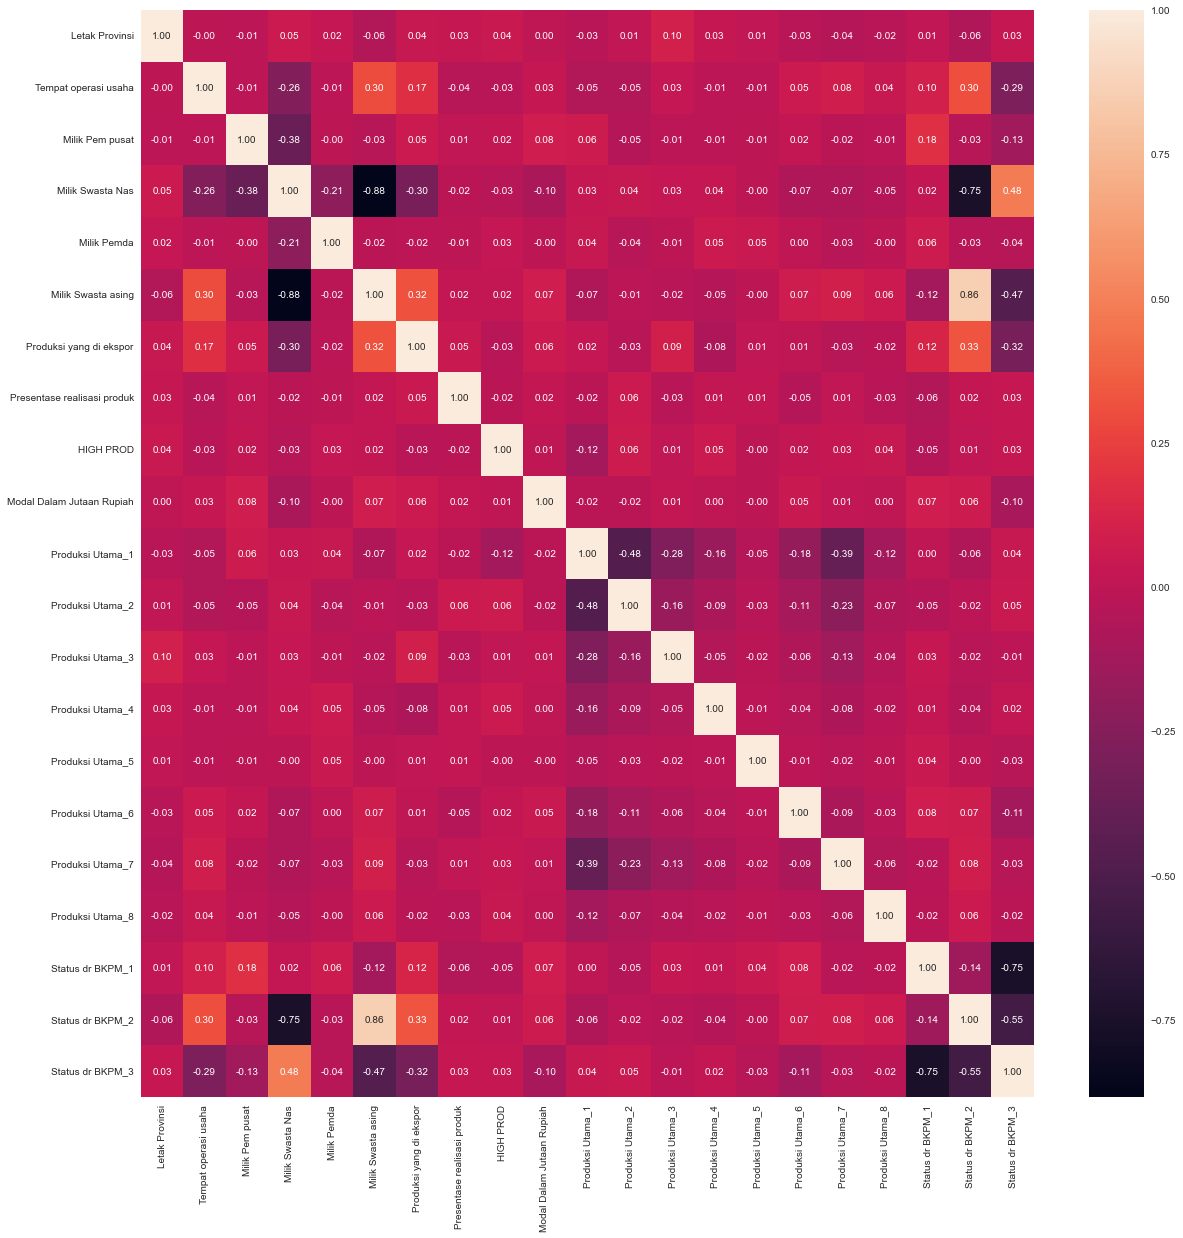

In [40]:
plt.figure(figsize=(20, 20))
sns.heatmap(data1.corr(), annot=True, fmt='.2f')


## Data viz

you can follow thus link below to look up our visualization

https://public.tableau.com/views/FinalProject2_16473593909990/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Modelling

### Train test split

In [41]:
x = data1.drop(['HIGH PROD'],axis = 1)
y = data1['HIGH PROD']

In [42]:
y=y.astype('int')

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7455, 20)
(1864, 20)
(7455,)
(1864,)


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9319 entries, 5 to 27997
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Letak Provinsi               9319 non-null   int64  
 1   Tempat operasi usaha         9319 non-null   float64
 2   Milik Pem pusat              9319 non-null   float64
 3   Milik Swasta Nas             9319 non-null   float64
 4   Milik Pemda                  9319 non-null   float64
 5   Milik Swasta asing           9319 non-null   float64
 6   Produksi yang di ekspor      9319 non-null   float64
 7   Presentase realisasi produk  9319 non-null   float64
 8   Modal Dalam Jutaan Rupiah    9319 non-null   float64
 9   Produksi Utama_1             9319 non-null   uint8  
 10  Produksi Utama_2             9319 non-null   uint8  
 11  Produksi Utama_3             9319 non-null   uint8  
 12  Produksi Utama_4             9319 non-null   uint8  
 13  Produksi Utama_5 

## Handling unbalance data

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

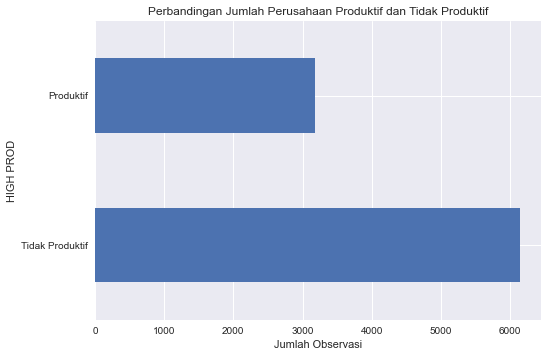

In [47]:
plt.style.use('seaborn')
data1.groupby('HIGH PROD').count().iloc[:,0].plot(kind='barh')
plt.title('Perbandingan Jumlah Perusahaan Produktif dan Tidak Produktif')
plt.xlabel('Jumlah Observasi')
plt.yticks(ticks=[1, 0], labels=['Produktif', 'Tidak Produktif'])
plt.show()

In [49]:
smote = SMOTE(random_state=1)
under_sampling = RandomUnderSampler(random_state=41)

In [50]:
y_train.value_counts()

0    4903
1    2552
Name: HIGH PROD, dtype: int64

In [51]:
# SMOTE
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [52]:
# UNDERSAMPLING
x_under, y_under = under_sampling.fit_resample(x_train, y_train)

In [53]:
y_smote.value_counts()

0    4903
1    4903
Name: HIGH PROD, dtype: int64

In [54]:
y_under.value_counts()

0    2552
1    2552
Name: HIGH PROD, dtype: int64

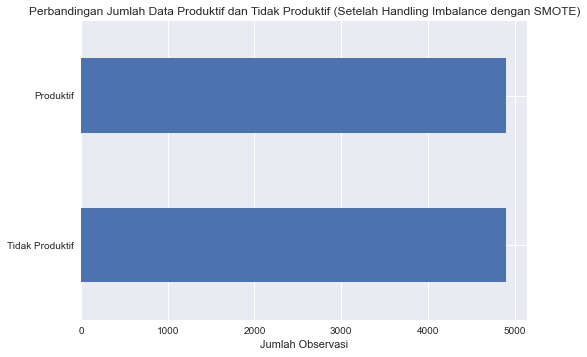

In [55]:
y_smote.value_counts().plot(kind='barh')
plt.title('Perbandingan Jumlah Data Produktif dan Tidak Produktif (Setelah Handling Imbalance dengan SMOTE)')
plt.xlabel('Jumlah Observasi')
plt.yticks(ticks=[1, 0], labels=['Produktif', 'Tidak Produktif'])
plt.show()

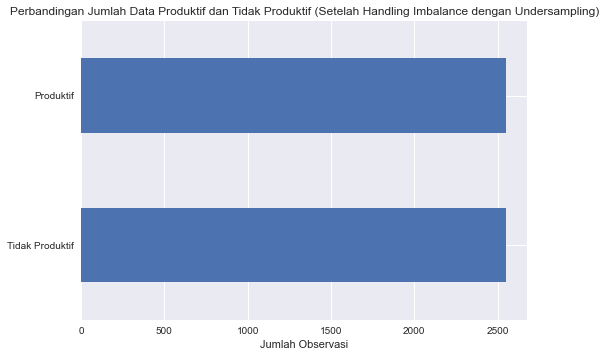

In [56]:
y_under.value_counts().plot(kind='barh')
plt.title('Perbandingan Jumlah Data Produktif dan Tidak Produktif (Setelah Handling Imbalance dengan Undersampling)')
plt.xlabel('Jumlah Observasi')
plt.yticks(ticks=[1, 0], labels=['Produktif', 'Tidak Produktif'])
plt.show()

## Modelling

in this case, we will use Supervised Clasification method to build a model.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
knn = KNeighborsClassifier(n_neighbors = 99)
rf = RandomForestClassifier(random_state = 123)
svm = SVC()
lr = LogisticRegression(random_state = 123)
dt = DecisionTreeClassifier(random_state = 123)

In [59]:
models = [rf, svm, lr, knn, dt]

for model in models:
    model.fit(x_train, y_train)

In [60]:
ypred_rf = rf.predict(x_test)
ypred_svm = svm.predict(x_test)
ypred_lr = lr.predict(x_test)
ypred_knn = knn.predict(x_test)
ypred_dt = dt.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from plot_metric.functions import BinaryClassification

## KNN

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1242
           1       0.67      0.03      0.05       622

    accuracy                           0.67      1864
   macro avg       0.67      0.51      0.43      1864
weighted avg       0.67      0.67      0.55      1864



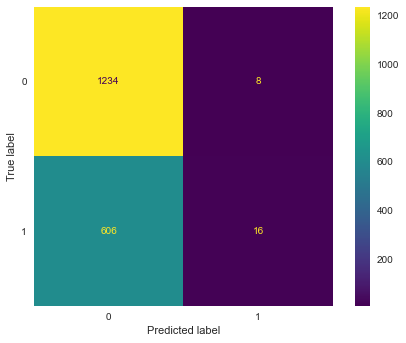

In [62]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(knn, x_test, y_test)
plt.grid(False)

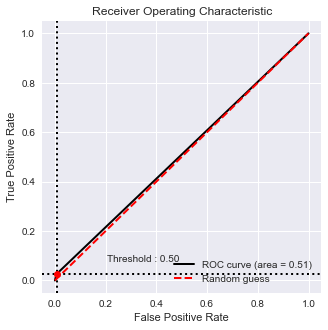

In [63]:
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## SVM

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1242
           1       0.67      0.01      0.01       622

    accuracy                           0.67      1864
   macro avg       0.67      0.50      0.41      1864
weighted avg       0.67      0.67      0.54      1864



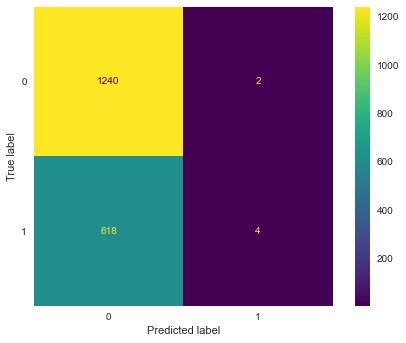

In [64]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(svm, x_test, y_test)
plt.grid(False)

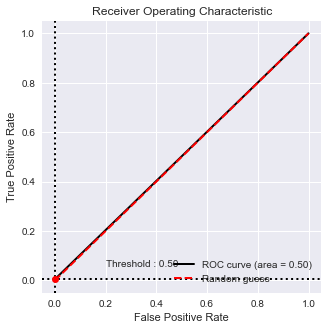

In [65]:
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1242
           1       0.41      0.32      0.36       622

    accuracy                           0.62      1864
   macro avg       0.55      0.55      0.55      1864
weighted avg       0.60      0.62      0.61      1864



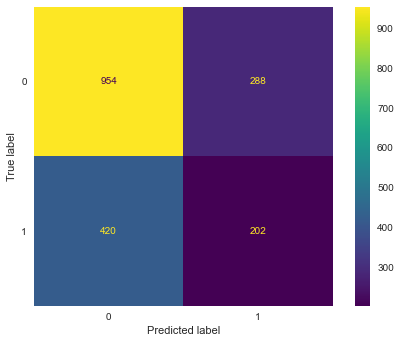

In [66]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(rf, x_test, y_test)
plt.grid(False)

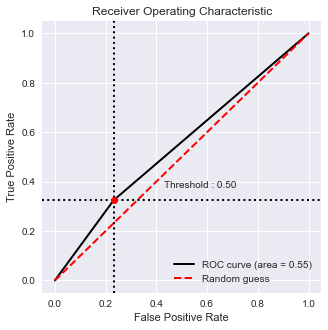

In [67]:
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regresion

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1242
           1       0.48      0.03      0.05       622

    accuracy                           0.67      1864
   macro avg       0.58      0.51      0.42      1864
weighted avg       0.61      0.67      0.55      1864



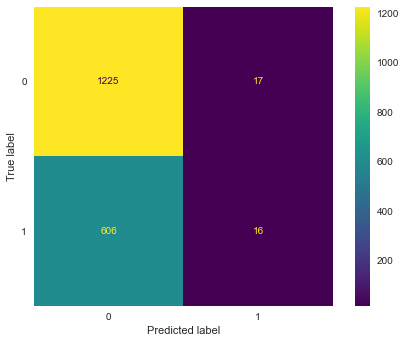

In [68]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(lr, x_test, y_test)
plt.grid(False)

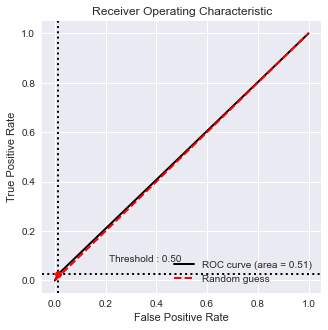

In [69]:
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Decission Tree

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1242
           1       0.39      0.42      0.40       622

    accuracy                           0.59      1864
   macro avg       0.55      0.55      0.55      1864
weighted avg       0.60      0.59      0.59      1864



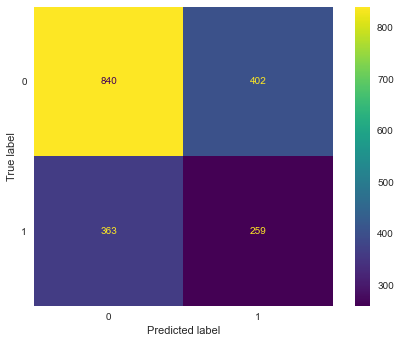

In [70]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(dt, x_test, y_test)
plt.grid(False)

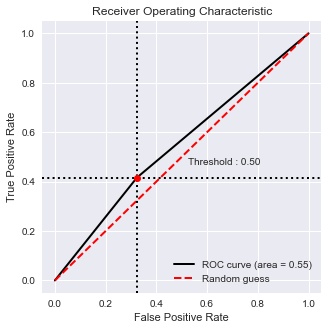

In [71]:
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Undersampling and SMOTE

In [72]:
knn_under = knn.fit(x_under, y_under)
svm_under = svm.fit(x_under,y_under)
lr_under = lr.fit(x_under,y_under)
rf_under = rf.fit(x_under,y_under)
dt_under = dt.fit(x_under,y_under)
knn_smote = knn.fit(x_smote, y_smote)
svm_smote = svm.fit(x_smote,y_smote)
lr_smote = lr.fit(x_smote,y_smote)
rf_smote = rf.fit(x_smote,y_smote)
dt_smote = dt.fit(x_smote,y_smote)

In [73]:
ypred_knn_under = knn_under.predict(x_test)
ypred_svm_under = svm_under.predict(x_test)
ypred_lr_under = lr_under.predict(x_test)
ypred_rf_under = rf_under.predict(x_test)
ypred_dt_under = dt_under.predict(x_test)
ypred_knn_smote = knn_smote.predict(x_test)
ypred_svm_smote = svm_smote.predict(x_test)
ypred_lr_smote = lr_smote.predict(x_test)
ypred_rf_smote = rf_smote.predict(x_test)
ypred_dt_smote = dt_smote.predict(x_test)

In [74]:
knn_under

KNeighborsClassifier(n_neighbors=99)

## Under Sampling

## KNN

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      1242
           1       0.37      0.56      0.45       622

    accuracy                           0.54      1864
   macro avg       0.54      0.55      0.53      1864
weighted avg       0.60      0.54      0.55      1864



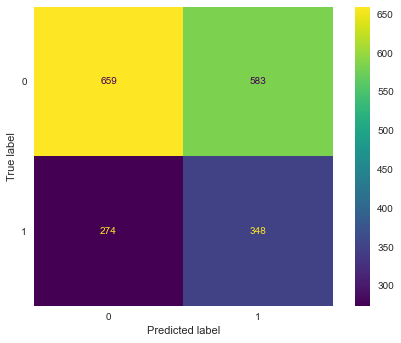

In [75]:
print(classification_report(y_test, ypred_knn_under))
plot_confusion_matrix(knn_under, x_test, y_test)
plt.grid(False)

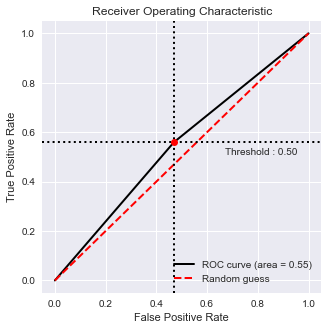

In [76]:
bc = BinaryClassification(y_test, ypred_knn_under, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## SVM

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1242
           1       0.37      0.18      0.24       622

    accuracy                           0.63      1864
   macro avg       0.52      0.51      0.50      1864
weighted avg       0.57      0.63      0.58      1864



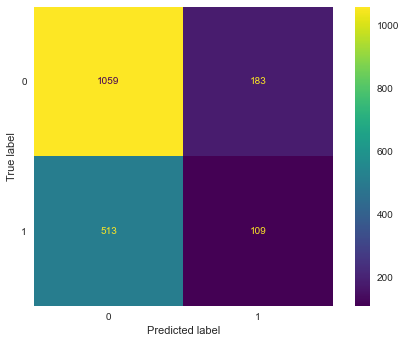

In [77]:
print(classification_report(y_test, ypred_svm_under))
plot_confusion_matrix(svm_under, x_test, y_test)
plt.grid(False)

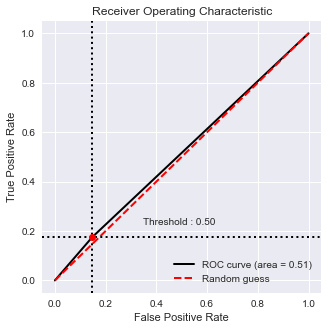

In [78]:
bc = BinaryClassification(y_test, ypred_svm_under, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## LR

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1242
           1       0.40      0.50      0.44       622

    accuracy                           0.58      1864
   macro avg       0.55      0.56      0.55      1864
weighted avg       0.61      0.58      0.59      1864



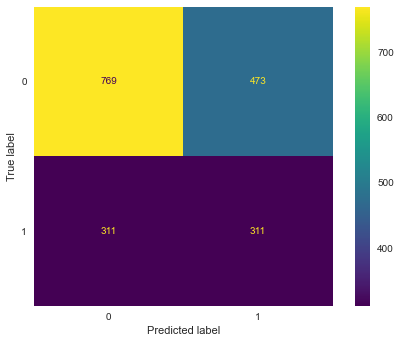

In [79]:
print(classification_report(y_test, ypred_lr_under))
plot_confusion_matrix(lr_under, x_test, y_test)
plt.grid(False)

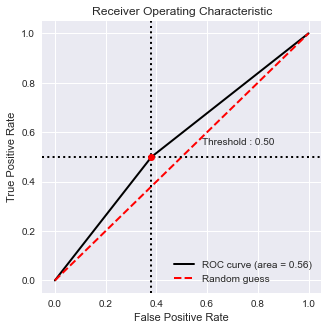

In [80]:
bc = BinaryClassification(y_test, ypred_lr_under, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## RF

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1242
           1       0.39      0.41      0.40       622

    accuracy                           0.59      1864
   macro avg       0.55      0.55      0.55      1864
weighted avg       0.60      0.59      0.59      1864



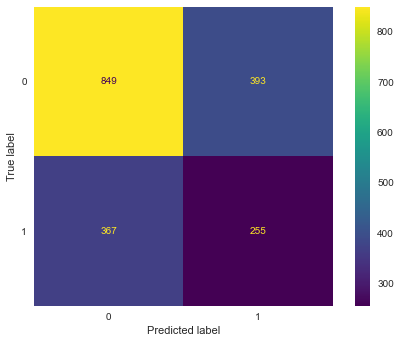

In [81]:
print(classification_report(y_test, ypred_rf_under))
plot_confusion_matrix(rf_under, x_test, y_test)
plt.grid(False)

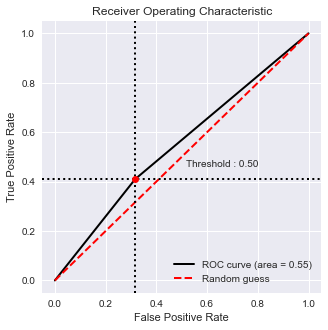

In [82]:
bc = BinaryClassification(y_test, ypred_rf_under, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## DT

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1242
           1       0.36      0.42      0.39       622

    accuracy                           0.56      1864
   macro avg       0.52      0.52      0.52      1864
weighted avg       0.58      0.56      0.57      1864



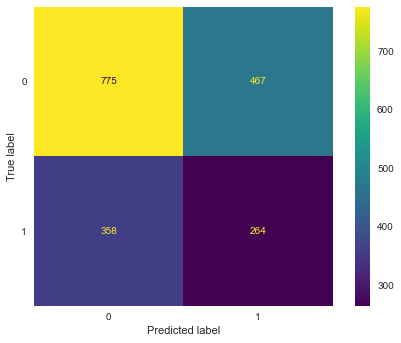

In [83]:
print(classification_report(y_test, ypred_dt_under))
plot_confusion_matrix(dt_under, x_test, y_test)
plt.grid(False)

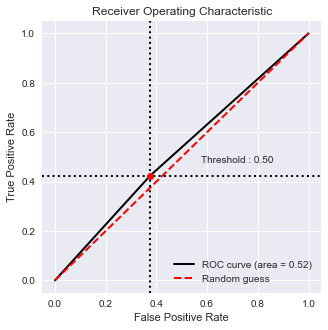

In [84]:
bc = BinaryClassification(y_test, ypred_dt_under, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## SMOTE

### KNN

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      1242
           1       0.37      0.56      0.45       622

    accuracy                           0.54      1864
   macro avg       0.54      0.55      0.53      1864
weighted avg       0.60      0.54      0.55      1864



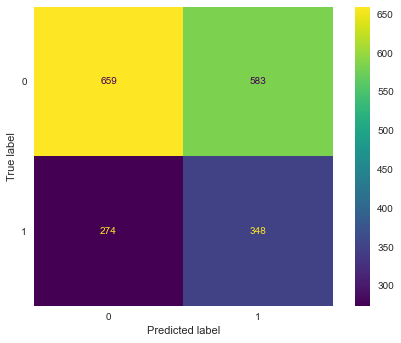

In [85]:
print(classification_report(y_test, ypred_knn_smote))
plot_confusion_matrix(knn_smote, x_test, y_test)
plt.grid(False)

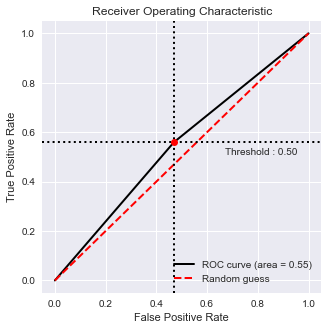

In [86]:
bc = BinaryClassification(y_test, ypred_knn_smote, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## SVM

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1242
           1       0.37      0.18      0.24       622

    accuracy                           0.63      1864
   macro avg       0.52      0.51      0.50      1864
weighted avg       0.57      0.63      0.58      1864



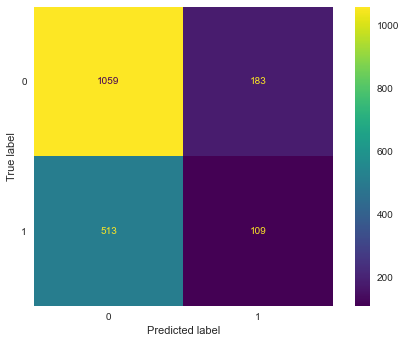

In [87]:
print(classification_report(y_test, ypred_svm_smote))
plot_confusion_matrix(svm_smote, x_test, y_test)
plt.grid(False)

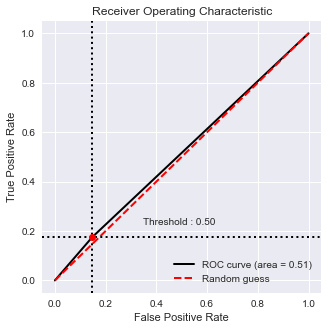

In [88]:
bc = BinaryClassification(y_test, ypred_svm_smote, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## LR

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1242
           1       0.40      0.50      0.44       622

    accuracy                           0.58      1864
   macro avg       0.55      0.56      0.55      1864
weighted avg       0.61      0.58      0.59      1864



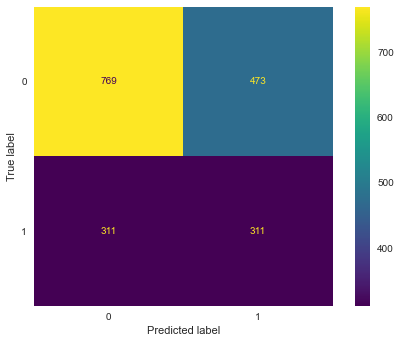

In [89]:
print(classification_report(y_test, ypred_lr_smote))
plot_confusion_matrix(lr_smote, x_test, y_test)
plt.grid(False)

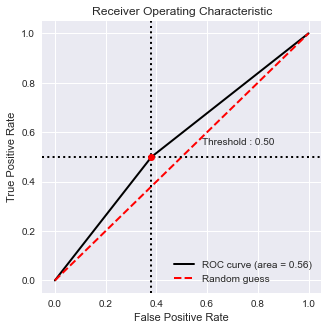

In [90]:
bc = BinaryClassification(y_test, ypred_lr_smote, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## RF

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1242
           1       0.39      0.41      0.40       622

    accuracy                           0.59      1864
   macro avg       0.55      0.55      0.55      1864
weighted avg       0.60      0.59      0.59      1864



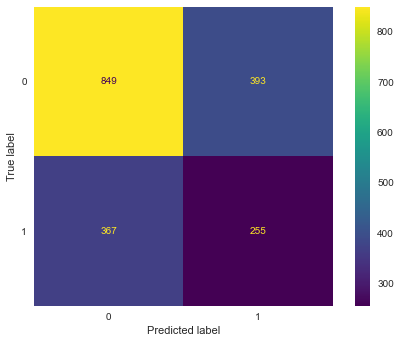

In [91]:
print(classification_report(y_test, ypred_rf_smote))
plot_confusion_matrix(rf_smote, x_test, y_test)
plt.grid(False)

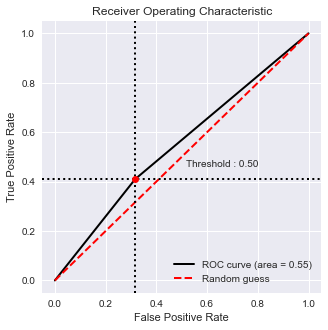

In [92]:
bc = BinaryClassification(y_test, ypred_rf_smote, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## DT

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1242
           1       0.36      0.42      0.39       622

    accuracy                           0.56      1864
   macro avg       0.52      0.52      0.52      1864
weighted avg       0.58      0.56      0.57      1864



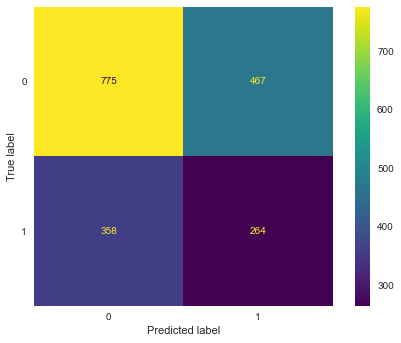

In [93]:
print(classification_report(y_test, ypred_dt_smote))
plot_confusion_matrix(dt_smote, x_test, y_test)
plt.grid(False)

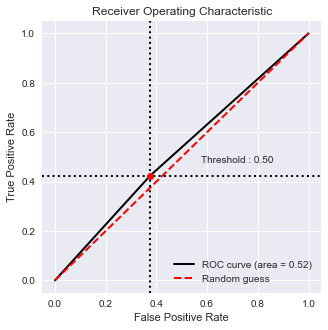

In [94]:
bc = BinaryClassification(y_test, ypred_dt_smote, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Evaluation

In [95]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score

In [96]:
eval_rf = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf)*100, recall_score(y_test, ypred_rf)*100,
                    precision_score(y_test, ypred_rf)*100, roc_auc_score(y_test, ypred_rf)*100,
                    f1_score(y_test, ypred_rf)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Model Score (%)'])

eval_lr = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr)*100, recall_score(y_test, ypred_lr)*100,
                    precision_score(y_test, ypred_lr)*100, roc_auc_score(y_test, ypred_lr)*100,
                    f1_score(y_test, ypred_lr)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Model Score (%)'])

eval_dt = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt)*100, recall_score(y_test, ypred_dt)*100,
                    precision_score(y_test, ypred_dt)*100, roc_auc_score(y_test, ypred_dt)*100,
                    f1_score(y_test, ypred_dt)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Model Score (%)'])

eval_svm = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm)*100, recall_score(y_test, ypred_svm)*100,
                    precision_score(y_test, ypred_svm)*100, roc_auc_score(y_test, ypred_svm)*100,
                    f1_score(y_test, ypred_svm)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Model Score (%)'])

eval_knn = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn)*100, recall_score(y_test, ypred_knn)*100,
                    precision_score(y_test, ypred_knn)*100, roc_auc_score(y_test, ypred_knn)*100,
                    f1_score(y_test, ypred_knn)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Model Score (%)'])

eval_rf_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf_under)*100, recall_score(y_test, ypred_rf_under)*100,
                    precision_score(y_test, ypred_rf_under)*100, roc_auc_score(y_test, ypred_rf_under)*100,
                    f1_score(y_test, ypred_rf_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Undersampling Model Score (%)'])

eval_lr_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr_under)*100, recall_score(y_test, ypred_lr_under)*100,
                    precision_score(y_test, ypred_lr_under)*100, roc_auc_score(y_test, ypred_lr_under)*100,
                    f1_score(y_test, ypred_lr_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Undersampling Model Score (%)'])

eval_dt_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt_under)*100, recall_score(y_test, ypred_dt_under)*100,
                    precision_score(y_test, ypred_dt_under)*100, roc_auc_score(y_test, ypred_dt_under)*100,
                    f1_score(y_test, ypred_dt_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Undersampling Model Score (%)'])

eval_svm_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm_under)*100, recall_score(y_test, ypred_svm_under)*100,
                    precision_score(y_test, ypred_svm_under)*100, roc_auc_score(y_test, ypred_svm_under)*100,
                    f1_score(y_test, ypred_svm_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Undersampling Model Score (%)'])

eval_knn_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn_under)*100, recall_score(y_test, ypred_knn_under)*100,
                    precision_score(y_test, ypred_knn_under)*100, roc_auc_score(y_test, ypred_knn_under)*100,
                    f1_score(y_test, ypred_knn_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Undersampling Model Score (%)'])

eval_rf_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf_smote)*100, recall_score(y_test, ypred_rf_smote)*100,
                    precision_score(y_test, ypred_rf_smote)*100, roc_auc_score(y_test, ypred_rf_smote)*100,
                    f1_score(y_test, ypred_rf_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Smote Model Score (%)'])

eval_lr_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr_smote)*100, recall_score(y_test, ypred_lr_smote)*100,
                    precision_score(y_test, ypred_lr_smote)*100, roc_auc_score(y_test, ypred_lr_smote)*100,
                    f1_score(y_test, ypred_lr_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Smote Model Score (%)'])

eval_dt_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt_smote)*100, recall_score(y_test, ypred_dt_smote)*100,
                    precision_score(y_test, ypred_dt_smote)*100, roc_auc_score(y_test, ypred_dt_smote)*100,
                    f1_score(y_test, ypred_dt_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Smote Model Score (%)'])

eval_svm_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm_smote)*100, recall_score(y_test, ypred_svm_smote)*100,
                    precision_score(y_test, ypred_svm_smote)*100, roc_auc_score(y_test, ypred_svm_smote)*100,
                    f1_score(y_test, ypred_svm_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Smote Model Score (%)'])

eval_knn_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn_smote)*100, recall_score(y_test, ypred_knn_smote)*100,
                    precision_score(y_test, ypred_knn_smote)*100, roc_auc_score(y_test, ypred_knn_smote)*100,
                    f1_score(y_test, ypred_knn_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Smote Model Score (%)'])

eval_all = pd.concat([eval_lr, eval_dt, eval_rf, eval_svm, eval_knn, eval_lr_under, eval_dt_under, eval_rf_under, eval_svm_under, eval_knn_under, eval_lr_smote, eval_dt_smote, eval_rf_smote, eval_svm_smote, eval_knn_smote], axis=1)
eval_all

,LR Model Score (%),DT Model Score (%),RF Model Score (%),SVM Model Score (%),KNN Model Score (%),LR Undersampling Model Score (%),DT Undersampling Model Score (%),RF Undersampling Model Score (%),SVM Undersampling Model Score (%),KNN Undersampling Model Score (%),LR Smote Model Score (%),DT Smote Model Score (%),RF Smote Model Score (%),SVM Smote Model Score (%),KNN Smote Model Score (%)
accuracy,66.577253,58.959227,62.017167,66.738197,67.060086,57.939914,55.740343,59.227468,62.660944,54.023605,57.939914,55.740343,59.227468,62.660944,54.023605
recall,2.572347,41.639871,32.475884,0.643087,2.572347,50.000000,42.443730,40.996785,17.524116,55.948553,50.000000,42.443730,40.996785,17.524116,55.948553
precision,48.484848,39.183056,41.224490,66.666667,66.666667,39.668367,36.114911,39.351852,37.328767,37.379162,39.668367,36.114911,39.351852,37.328767,37.379162
roc_auc_score,50.601794,54.636361,54.643739,50.241028,50.964112,55.958132,52.421543,54.677136,51.394908,54.504067,55.958132,52.421543,54.677136,51.394908,54.504067
f1_score,4.885496,40.374123,36.330935,1.273885,4.953560,44.238976,39.024390,40.157480,23.851204,44.816484,44.238976,39.024390,40.157480,23.851204,44.816484


## Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [125]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'knn': {
        'model':  KNeighborsClassifier(), 
        'params' : {
            'n_neighbors': [10],
            'leaf_size': [5,35,40]
        }
    },
}

In [126]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Wall time: 24.4 s


,model,best_score,best_params
0,svm,0.666311,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
1,knn,0.643766,"{'leaf_size': 5, 'n_neighbors': 10}"


In [98]:
param_grid_rf = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [99]:
%%time
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv= 3)
CV_rf.fit(x_smote, y_smote)

Wall time: 5min 49s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [119]:
CV_rf.best_params_ 

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500}

In [101]:
CV_rf.best_score_

0.6617439033568183

In [102]:
rf_new = RandomForestClassifier(criterion='entropy', 
                                 max_features='auto', 
                                 n_estimators= 500,
                                 random_state=123)
rf_new.fit(x_smote, y_smote)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=123)

In [103]:
pred_rf_new = rf_new.predict(x_test)

In [104]:
eval_rf_new = pd.DataFrame(data = [accuracy_score(y_test, pred_rf_new)*100, 
                                   recall_score(y_test, pred_rf_new)*100,
                                   precision_score(y_test, pred_rf_new)*100, 
                                   roc_auc_score(y_test, pred_rf_new)*100,
                                   f1_score(y_test, pred_rf_new)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Model Score After Tuning(%)'])

In [105]:
pd.concat([eval_rf_smote, eval_rf_new], axis=1)

,RF Smote Model Score (%),RF Model Score After Tuning(%)
accuracy,59.227468,58.959227
recall,40.996785,40.192926
precision,39.351852,38.880249
roc_auc_score,54.677136,54.275207
f1_score,40.157480,39.525692


In [106]:
CF=confusion_matrix(y_test, pred_rf_new)
CF

array([[849, 393],
       [372, 250]], dtype=int64)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1242
           1       0.39      0.40      0.40       622

    accuracy                           0.59      1864
   macro avg       0.54      0.54      0.54      1864
weighted avg       0.59      0.59      0.59      1864



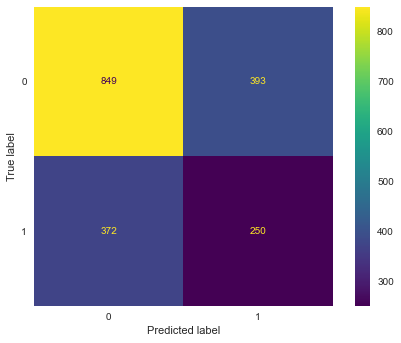

In [107]:
print(classification_report(y_test, pred_rf_new))
plot_confusion_matrix(rf_new, x_test, y_test)
plt.grid(False)

In [108]:
importance = rf_new.feature_importances_

In [109]:
importance

array([0.04020742, 0.03239302, 0.00272406, 0.0134776 , 0.00293157,
       0.01058295, 0.03511728, 0.2040743 , 0.559823  , 0.02139071,
       0.00920764, 0.01056996, 0.00564223, 0.00177924, 0.00716049,
       0.00984195, 0.00480435, 0.00957802, 0.00747224, 0.01122198])